In [4]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import random


def traverse_directory(directory_path):
    """
    Recursively traverses a directory, displays information including images,
    and randomly selects 20 images from all subdirectories to display.

    Args:
        directory_path: The path to the directory to be traversed.
    """

    all_images = []

    def explore_dir(current_path):
        """
        Helper function to recursively explore directories and count files/folders.

        Args:
            current_path: The path to the current directory being explored.
        """
        folder_count = 0
        file_count = 0
        image_count = 0

        # Recursively explore the current directory
        for root, dirs, files in os.walk(current_path):
            folder_count += len(dirs)
            file_count += len(files)
            print(f"Directory: \n{root}")
            print(f"  Number of subdirectories: {folder_count}")
            print(f"  Number of files: {file_count}")

            # Collect images from the current directory
            for file in files:
                if file.endswith((".jpg", ".jpeg", ".png")):
                    image_count += 1
                    image_path = os.path.join(root, file)
                    try:
                        img = Image.open(image_path)
                        all_images.append(img)
                    except OSError:
                        pass

            # Recursively explore subdirectories
            for sub_dir in dirs:
                sub_path = os.path.join(root, sub_dir)
                explore_dir(sub_path)

            print(f"  Number of images: {image_count}")
            break  # Break after first iteration to manually recurse subdirectories

    # Start recursive traversal
    explore_dir(directory_path)

    # Randomly select 20 images to display
    if all_images:
        random_images = random.sample(all_images, min(20, len(all_images)))

        # Display 20 (or fewer) images in a 4x5 grid
        fig, axs = plt.subplots(4, 5, figsize=(15, 12))
        axs = axs.flatten()

        for i, img in enumerate(random_images):
            axs[i].imshow(img)
            axs[i].axis("off")

        plt.tight_layout()
        plt.show()
    else:
        print("No images found in the directory.")

In [2]:
os.chdir("..")

Directory: /Data/Projects/Research_ThyroidFNA_ClassAI/phase3_140924/tests/temp_data_for_tests/augmented/augmented_train_1726371567_70_20_10_42
  Number of subdirectories: 3
  Number of files: 0
Directory: /Data/Projects/Research_ThyroidFNA_ClassAI/phase3_140924/tests/temp_data_for_tests/augmented/augmented_train_1726371567_70_20_10_42/B2
  Number of subdirectories: 0
  Number of files: 110
  Number of images: 110
Directory: /Data/Projects/Research_ThyroidFNA_ClassAI/phase3_140924/tests/temp_data_for_tests/augmented/augmented_train_1726371567_70_20_10_42/B5
  Number of subdirectories: 0
  Number of files: 220
  Number of images: 220
Directory: /Data/Projects/Research_ThyroidFNA_ClassAI/phase3_140924/tests/temp_data_for_tests/augmented/augmented_train_1726371567_70_20_10_42/B6
  Number of subdirectories: 0
  Number of files: 132
  Number of images: 132
  Number of images: 0


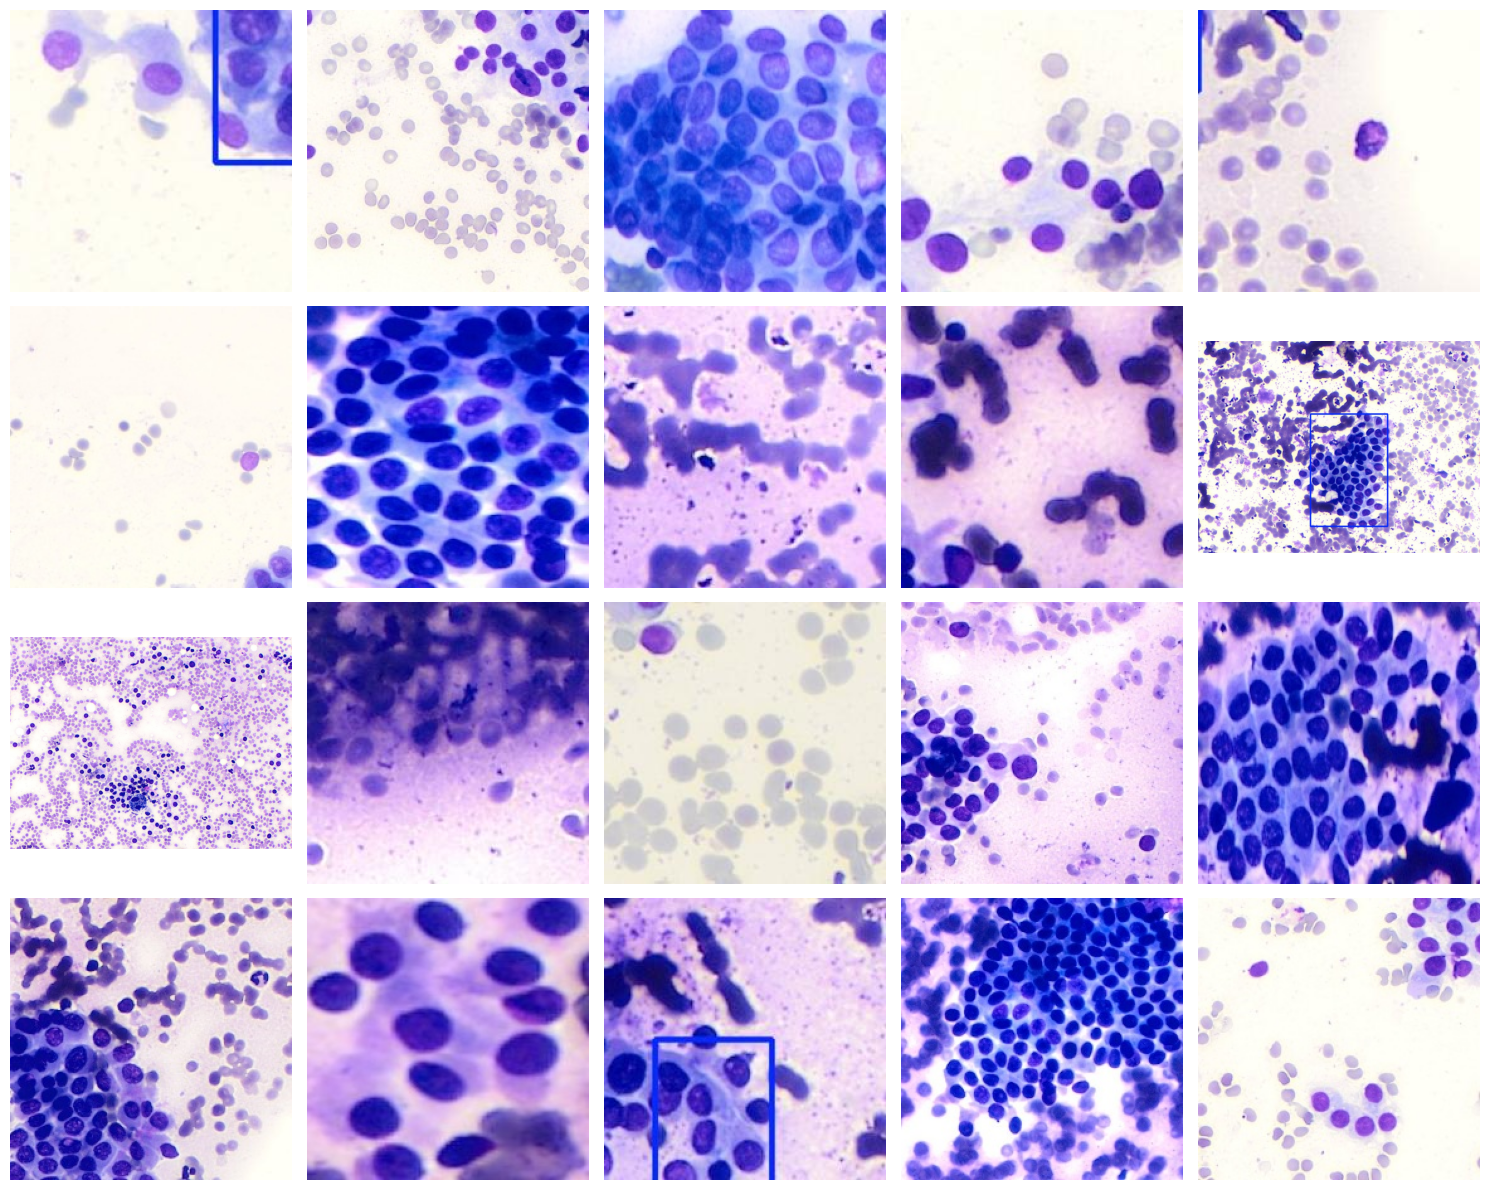

In [5]:
root_directory = "/Data/Projects/Research_ThyroidFNA_ClassAI/phase3_140924/tests/temp_data_for_tests/augmented/augmented_train_1726371567_70_20_10_42"
traverse_directory(root_directory)